<img src=attachment:ff331d90-befd-48b6-aea3-71406b1c9954.png>
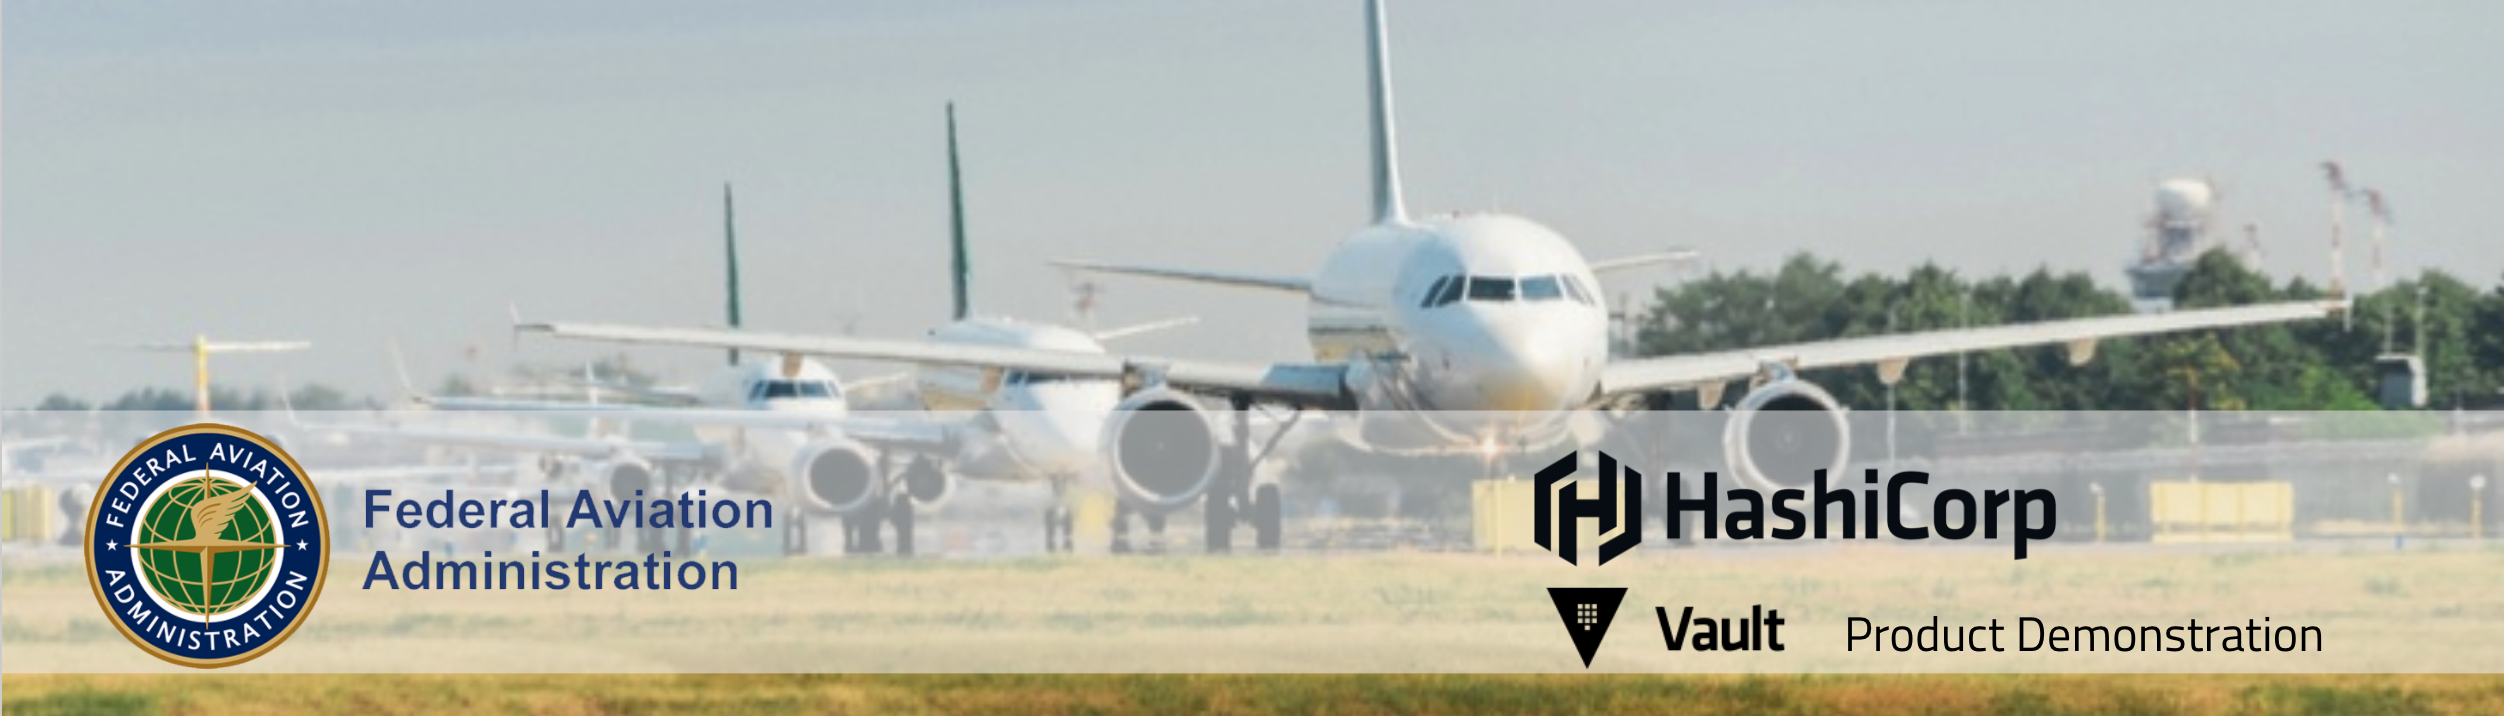

### Setup
---
*Internal HashiCorp Use Only*  
Open 3 Terminals within this Demo and execute `vrd`, `vrd2`, and `vrd3`, one command per terminal.

# Vault Capabilties Aligned
---

## Start Vault Server (in Dev mode)

In [ ]:
vault version

In [ ]:
export VAULT_ADDR=http://127.0.0.1:8200
export VAULT_TOKEN=root
export VAULT_SKIP_VERIFY=true

In [ ]:
vault login root

## AWS Dynamic Credentials
---

**Enable the AWS secrets engine**

In [ ]:
vault secrets enable -path=aws aws

**Add privileged account to AWS secrets engine (permitted to create sub-accounts)**

In [ ]:
vault write aws/config/root \
  access_key=$AWS_ACCESS_KEY \
  secret_key=$AWS_SECRET_ACCESS_KEY \
  region=$AWS_DEFAULT_REGION

**Create a role** (When I ask AWS for a credential for 'my-role', create it and attach the IAM policy.)

In [ ]:
vault write aws/roles/my-role \
        credential_type=iam_user \
        policy_document=-<<EOF
{
  "Version": "2012-10-17",
  "Statement": [
    {
      "Sid": "Stmt1426528957000",
      "Effect": "Allow",
      "Action": [
        "ec2:*"
      ],
      "Resource": [
        "*"
      ]
    }
  ]
}
EOF

**Generate the secret**

In [ ]:
vault read aws/creds/my-role

**Revoke the secret**

In [ ]:
vault lease revoke aws/creds/my-role/9UKpCFS2p3CseLkp6WVIS1i8

## ec2-user SSH Keys
---

## Retrieve ec2-user SSH keys from Vault
---

## Windows Local Admin Accounts
---

## Database Engine
---

## General Secrets/Password Management
---